<a href="https://colab.research.google.com/github/edufrantzk/german_credit_risk/blob/main/german_loan_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction - context about the data

Each entry in the dataset represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks.

Target variable:
* Risk (Good or Bad Risk)

Attributes:

* Age (numeric)
* Sex (object: male, female)
* Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
* Housing (object: own, rent, or free)
* Saving accounts (object: little, moderate, quite rich, rich)
* Checking account (object: little, moderate, rich)
* Credit amount (numeric)
* Duration (numeric, in months)
* Purpose(object: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

Content:

* Data importing and cleaning
* Exploratory data analysis
* Transforming the data
* Correlations
* Data pre-processing
* Logistic Regression application


https://www.kaggle.com/datasets/uciml/german-credit

## Data importing and cleaning

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/german_credit_data.csv')

In [ ]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
#Drop duplicate id column
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

Dealing with the null values

As we can see two of our variables have null values

In [ ]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

Let's check this variables 

In [ ]:
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [ ]:
df['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

Ok, now consideration the answers we have for this variables i believe is unnecessary to drop all the null rows, so we will just fill in them with "none"

In [ ]:
df['Saving accounts'] = df['Saving accounts'].fillna('none')

In [ ]:
df['Checking account'] = df['Checking account'].fillna('none')

Good, we don't have any missing values in our dataset

In [ ]:
df.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [ ]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


# Exploratory Data Analysis

Let's take a look through our target variable.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Target Variable')]

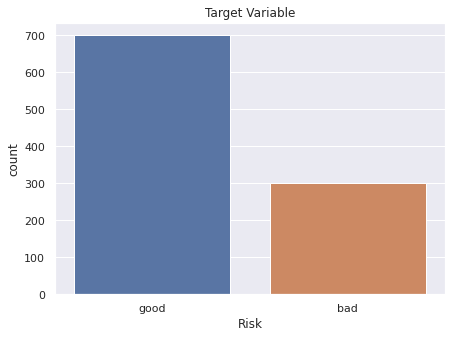

In [ ]:
plt.subplots(figsize=(7, 5), sharex=True)
sns.set_theme()
sns.countplot(df['Risk']).set(title='Target Variable')

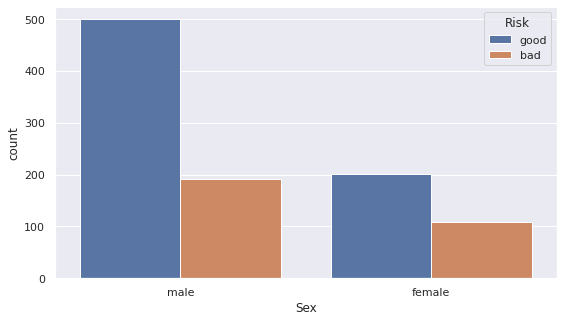

In [ ]:
plt.subplots(figsize=(9, 5), sharex=True)
sns.countplot(x='Sex', data=df,hue='Risk')

Visualizing the other attributes.

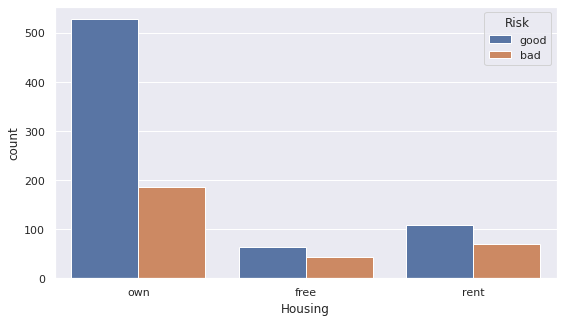

In [ ]:
plt.subplots(figsize=(9, 5), sharex=True)
sns.countplot(x='Housing',data=df,hue='Risk');

- People who own a house means low risk and good rating to the bank.


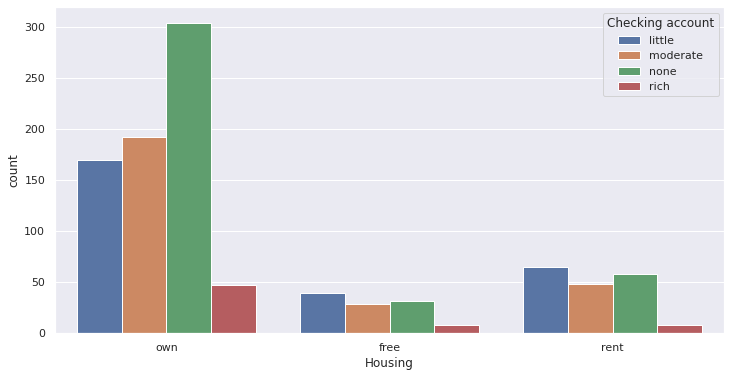

In [ ]:
plt.subplots(figsize=(12, 6), sharex=True)
sns.countplot(x='Housing',data=df,hue='Checking account');

- Much of the people that own a house has no record for them checking account but still we se a correlation between having more balance in the checking account and having your own house.

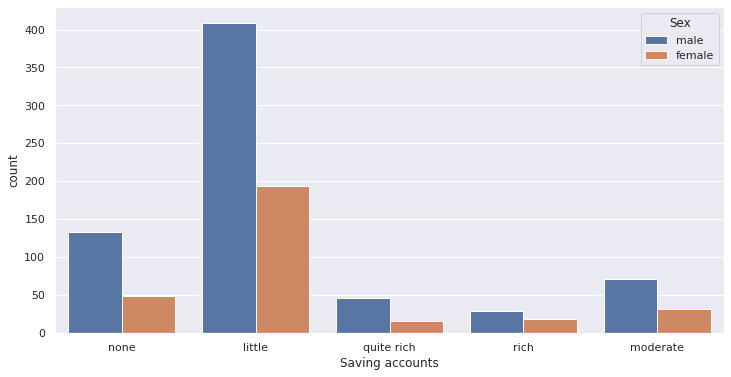

In [ ]:
plt.subplots(figsize=(12, 6), sharex=True)
sns.countplot(x='Saving accounts',data=df,hue='Sex');

- About the saving accounts, we can see that more than 50% of the people little or none savings.

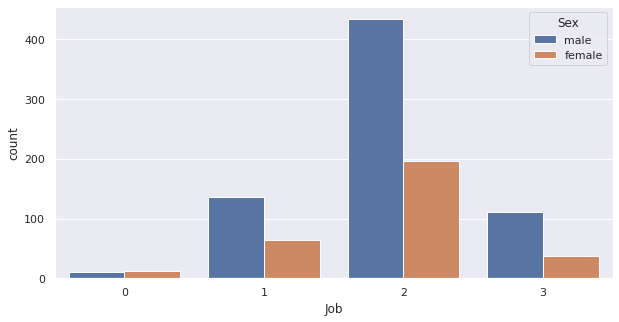

In [ ]:
plt.subplots(figsize=(10, 5), sharex=True)
sns.countplot(data=df,x='Job',hue='Sex')


- Most of people in records have job skill level 2, but the job skill level does not affect the risk rating much.

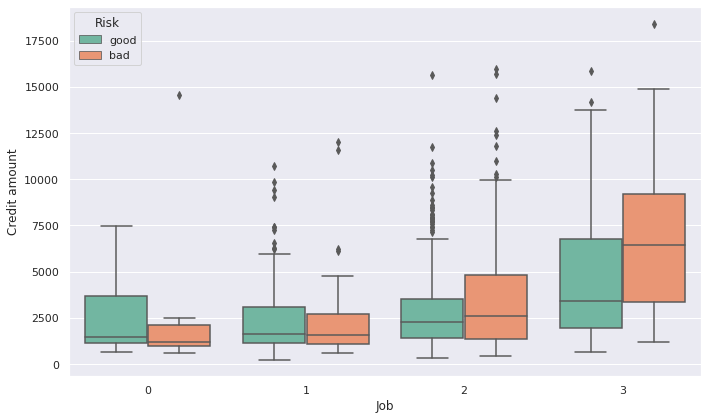

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
box = sns.boxplot(x='Job',y='Credit amount', hue='Risk', data=df, palette='Set2')

fig.subplots_adjust(bottom=0.2)
plt.tight_layout()

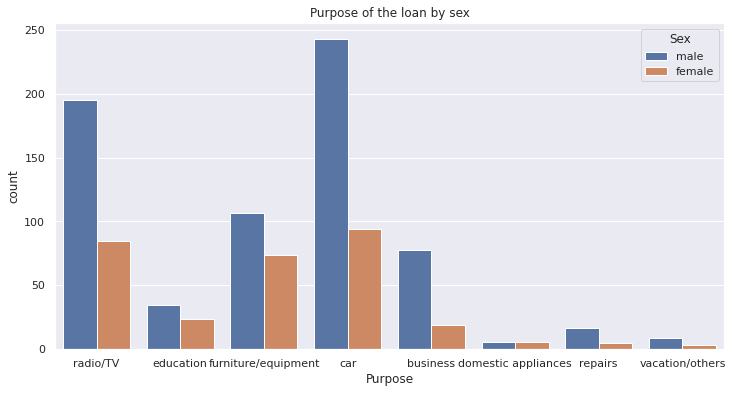

In [ ]:
plt.subplots(figsize=(12, 6), sharex=True)
sns.countplot(data=df,x='Purpose',hue='Sex').set(title='Purpose of the loan by sex');

- The majority of people want a loan to buy a car... Interesting.

#### Now Let's visualize some distribution plots

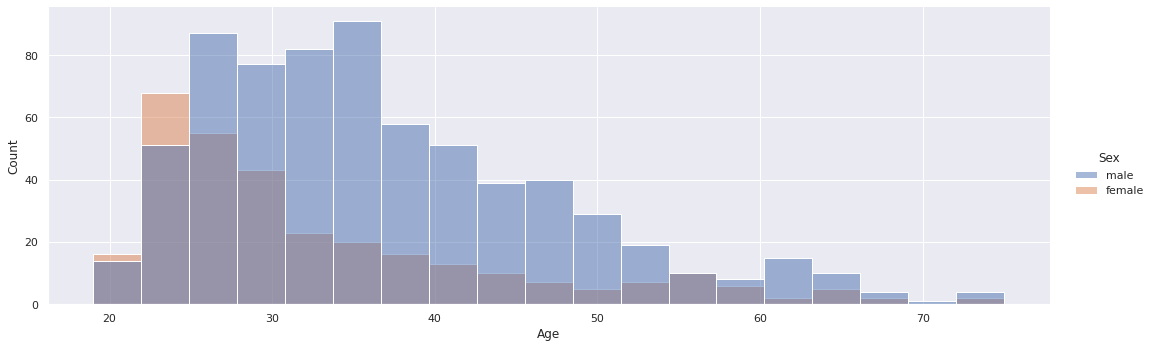

In [ ]:
sns.displot(x='Age', data=df, hue='Sex',kde=False,aspect=3);

With this distribution we see the age of the people who compose the data, in mean they have 35 years.

In [ ]:
# Longest duration for credit amount
df[['Duration','Sex','Age','Housing','Job']].sort_values(by='Duration',ascending=False).head(20)

,Duration,Sex,Age,Housing,Job
677,72,male,24,own,2
973,60,male,36,rent,2
685,60,male,34,free,2
672,60,male,42,own,3
714,60,male,27,own,3
637,60,male,21,own,2
616,60,male,27,free,3
134,60,female,21,own,2
255,60,male,27,own,1
373,60,male,63,free,3


In [ ]:
df['Duration'].value_counts()

24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: Duration, dtype: int64

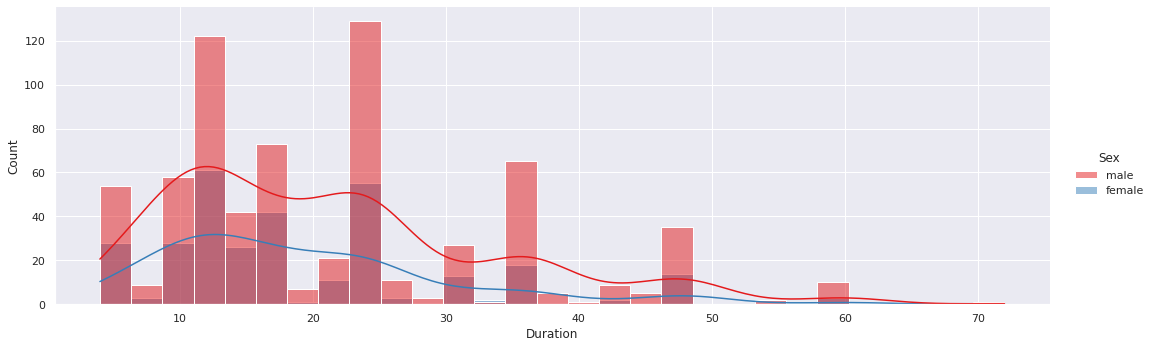

In [ ]:
sns.displot(data=df,x='Duration',hue='Sex',kde=True,palette='Set1',aspect=3);


In the distribution of the duration of the loan we see a peak between 10 and 25 months.

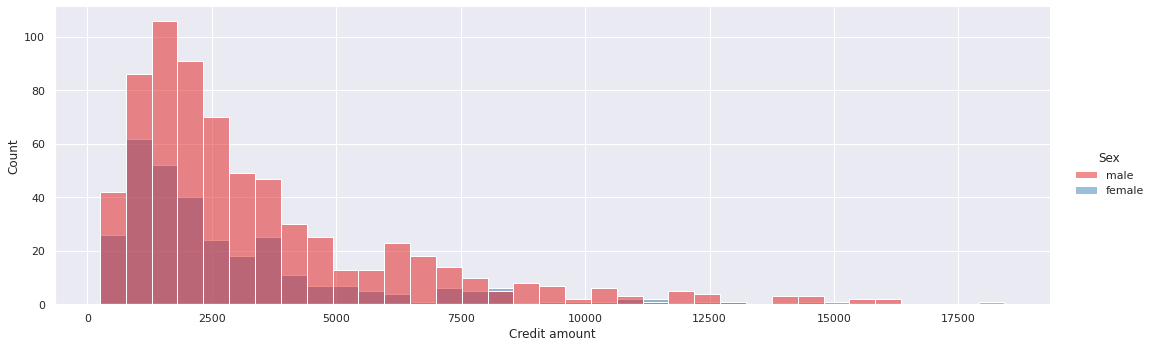

In [ ]:
sns.displot(data=df,x='Credit amount',hue='Sex',kde=False,palette='Set1',aspect=3);

In [ ]:
med_cred = df['Credit amount'].median()
print(f'In Median the credit amount that is required is between {med_cred}')

In Median the credit amount that is required is between 2319.5


# Transforming the data - Feature engenieering

Here our goal will be:

* Convert the sex and risk columns into binary encode;
* Ordinal encode the Saving accounts and Checking account columns;
* One-hot encode the Housing and Purpose columns.


Binary encoding

In [ ]:
df['Risk'] = df['Risk'].map({'bad':1,'good':0})
df['Sex'] = df['Sex'].map({'male':1, 'female':0})

In [ ]:
df['Risk'].value_counts()

0    700
1    300
Name: Risk, dtype: int64

In [ ]:
df['Sex'].value_counts()

1    690
0    310
Name: Sex, dtype: int64

Ordinal Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe = OrdinalEncoder(categories=[['none', 'little', 'moderate', 'rich', 'quite rich'], ['none', 'little', 'moderate', 'rich']])
oe.fit_transform(df[['Saving accounts', 'Checking account']])

array([[0., 1.],
       [1., 2.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 1.],
       [2., 2.]])

In [ ]:
df[['Saving accounts', 'Checking account']] = oe.fit_transform(df[['Saving accounts', 'Checking account']])

In [ ]:
df['Saving accounts'].value_counts()

1.0    603
0.0    183
2.0    103
4.0     63
3.0     48
Name: Saving accounts, dtype: int64

In [ ]:
df['Checking account'].value_counts()

0.0    394
1.0    274
2.0    269
3.0     63
Name: Checking account, dtype: int64

One-hot-encoding

In [ ]:
def onehot_encode(df, columns_with_prefixes):
    df = df.copy()
    for column, prefix in columns_with_prefixes:
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df  

In [ ]:
df1 = df.copy()

In [ ]:
# One-hot encode the Housing and Purpose columns

df1 = onehot_encode(df1, columns_with_prefixes=[('Housing', 'H'),('Purpose', 'P')])

In [ ]:
df1

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Risk,H_free,H_own,H_rent,P_business,P_car,P_domestic appliances,P_education,P_furniture/equipment,P_radio/TV,P_repairs,P_vacation/others
0,67,1,2,0.0,1.0,1169,6,0,0,1,0,0,0,0,0,0,1,0,0
1,22,0,2,1.0,2.0,5951,48,1,0,1,0,0,0,0,0,0,1,0,0
2,49,1,1,1.0,0.0,2096,12,0,0,1,0,0,0,0,1,0,0,0,0
3,45,1,2,1.0,1.0,7882,42,0,1,0,0,0,0,0,0,1,0,0,0
4,53,1,2,1.0,1.0,4870,24,1,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1.0,0.0,1736,12,0,0,1,0,0,0,0,0,1,0,0,0
996,40,1,3,1.0,1.0,3857,30,0,0,1,0,0,1,0,0,0,0,0,0
997,38,1,2,1.0,0.0,804,12,0,0,1,0,0,0,0,0,0,1,0,0
998,23,1,2,1.0,1.0,1845,45,1,1,0,0,0,0,0,0,0,1,0,0


# Correlations

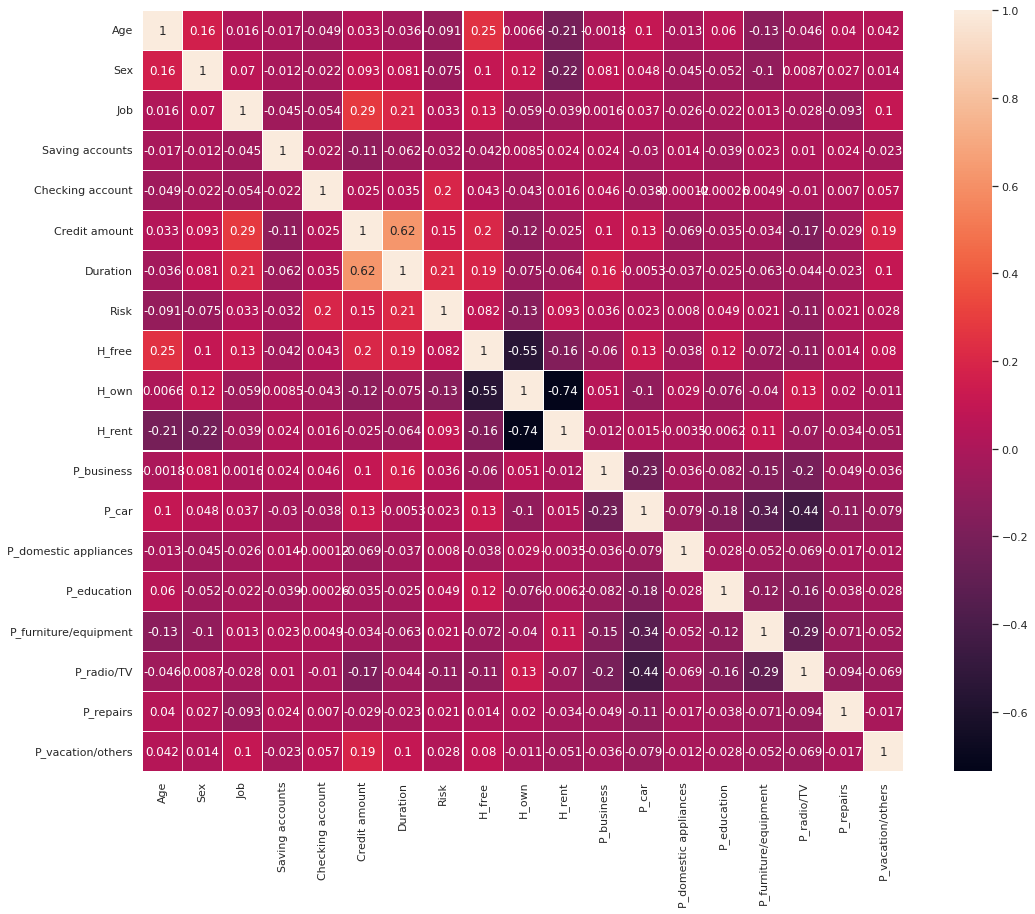

In [ ]:
plt.figure(figsize=(18,14))
sns.heatmap(df1.corr(),linewidths=0.1,vmax=1.0, square=True,  linecolor='white', annot=True)
plt.show()



# Pre-processing

In [ ]:
X = df1.drop('Risk', axis=1).copy()
X.values

array([[67.,  1.,  2., ...,  1.,  0.,  0.],
       [22.,  0.,  2., ...,  1.,  0.,  0.],
       [49.,  1.,  1., ...,  0.,  0.,  0.],
       ...,
       [38.,  1.,  2., ...,  1.,  0.,  0.],
       [23.,  1.,  2., ...,  1.,  0.,  0.],
       [27.,  1.,  2., ...,  0.,  0.,  0.]])

In [ ]:
y = df1['Risk'].values
y

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((750, 18), (750,))

In [ ]:
X_test.shape, y_test.shape

((250, 18), (250,))

In [ ]:
# Printing the split
print(f'{len(X_train)/len(df1.index)*100}% is the train data.')
print(f'{len(X_test)/len(df1.index)*100}% is the test data.')

75.0% is the train data.
25.0% is the test data.


# Model
Using Logistic Regression to predictict the credit score.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_log = log_model.predict(X_test)

In [ ]:
values = {'Test':y_test, 'Predict':y_pred_log}

In [ ]:
values_pd = pd.DataFrame(values)
values_pd

,Test,Predict
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
245,0,0
246,0,0
247,0,0
248,0,0


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

In [ ]:
print(f'Accuracy Score:{accuracy_score(y_test,y_pred_log):.3f}%')
print(confusion_matrix(y_test, y_pred_log))

Accuracy Score:0.708%
[[160  18]
 [ 55  17]]


In [ ]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       178
           1       0.49      0.24      0.32        72

    accuracy                           0.71       250
   macro avg       0.61      0.57      0.57       250
weighted avg       0.67      0.71      0.67       250



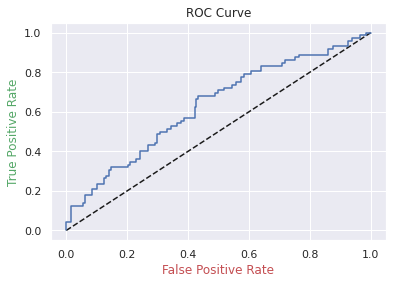

In [ ]:
#Predicting proba
y_pred_prob = log_model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', color='r')
plt.ylabel('True Positive Rate', color='g')
plt.title('ROC Curve')
plt.show()

This is my first classification project so it is important to note that he has room for improvement in feature engineering and in the application of feature selection methods.

Buth with these results, it is already possible for the company to predict among the new consumer data which may be in default, directing actions that seek to reduce these losses.

